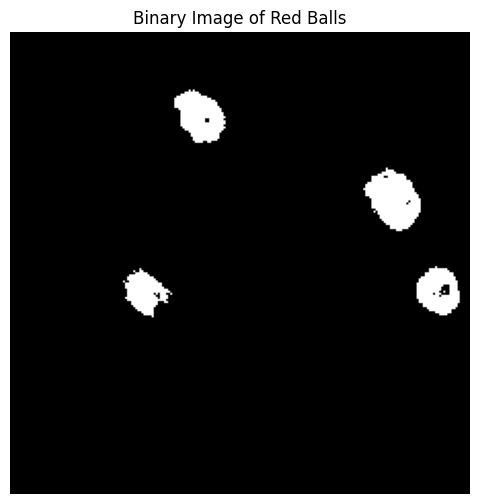

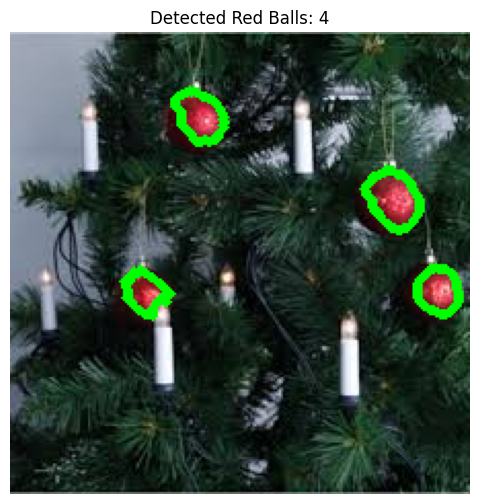

Number of red balls detected: 4


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('data/redball.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

#Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#Define a range for the red color in HSV
# Red has two ranges in HSV: one in the lower hue values (0-10) and one in the higher (160-180).
lower_red1 = np.array([0, 120, 70])    # Lower red range
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])  # Higher red range
upper_red2 = np.array([180, 255, 255])

#Threshold the HSV image to create a binary mask for the red color
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)  # Mask for lower red
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)  # Mask for higher red

# Combine the two masks to capture the full red color range
red_mask = mask1 + mask2
# Step 6: Create a binary image where the red balls are white and the rest is black
binary_image = red_mask

# Display the binary image
plt.figure(figsize=(8, 6))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image of Red Balls')
plt.axis('off')
plt.show()

#Count the number of red balls
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
output_image = image_rgb.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 3)

# Display the image with detected red balls
plt.figure(figsize=(8, 6))
plt.imshow(output_image)
plt.title(f'Detected Red Balls: {len(contours)}')
plt.axis('off')
plt.show()

# Print the count of red balls
print(f'Number of red balls detected: {len(contours)}')
